# Proyek Analisis Data: Bike_sharing_dataset
- **Nama:** Muhammad Akmal
- **Email:** makmal1709@gmail.com
- **ID Dicoding:** mal_mozzie_17

## Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Kapan waktu paling sibuk untuk penyewaan sepeda?
- Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

Dataset penggunaan sepeda menyediakan data harian (day.csv) dan data jam (hour.csv).

In [76]:
day_df = pd.read_csv("./datasets/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
hour_df = pd.read_csv("./datasets/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel day_df

In [78]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [79]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [80]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [81]:
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        outliers_count[column] = outliers.sum()

    return outliers_count

outliers_count_day_df = detect_outliers(day_df)

print(outliers_count_day_df)

{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


In [82]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [83]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [84]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [85]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [86]:
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        outliers_count[column] = outliers.sum()

    return outliers_count

outliers_count_hour_df = detect_outliers(hour_df)

print(outliers_count_hour_df)

{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


In [87]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel day_df

In [88]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [89]:
day_df.drop_duplicates(inplace=True)

In [90]:
day_df.ffill(inplace=True)

In [91]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(2), datetime64

#### Membersihkan tabel hour_df

In [92]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df['season'] = hour_df['season'].astype('category')
hour_df['hr'] = hour_df['hr'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [93]:
hour_df.drop_duplicates(inplace=True)

In [94]:
hour_df.ffill(inplace=True)

In [95]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

#### Explore day_df

In [96]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
539,540,2012-06-23,3,1,6,0,6,0,1,0.731667,0.652792,0.534583,0.179721,2657,4801,7458
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
261,262,2011-09-19,3,0,9,0,1,1,2,0.549167,0.529675,0.690000,0.151742,691,3848,4539
57,58,2011-02-27,1,0,2,0,0,0,1,0.343478,0.351109,0.680000,0.125248,694,1708,2402
318,319,2011-11-15,4,0,11,0,2,1,2,0.530000,0.507579,0.688750,0.199633,449,3746,4195


In [97]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,NaN,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Explore hour_df

In [98]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
789,790,2011-02-05,1,0,2,8,0,6,0,3,0.20,0.2273,1.00,0.0896,0,10,10
7919,7920,2011-12-01,4,0,12,15,0,4,1,1,0.40,0.4091,0.40,0.2239,10,144,154
17243,17244,2012-12-26,1,1,12,8,0,3,1,3,0.20,0.1818,0.86,0.3284,0,31,31
13550,13551,2012-07-23,3,1,7,19,0,1,1,1,0.80,0.7424,0.52,0.2537,94,488,582
9777,9778,2012-02-17,1,1,2,8,0,5,1,2,0.26,0.3030,1.00,0.0000,4,516,520


In [99]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,24.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,17.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,730.0,NaN,NaN,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,NaN,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,NaN,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,NaN,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,NaN,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Mengelompokkan Data

##### Berdasarkan Musim

In [100]:
agg_data = day_df.groupby('season', observed=True).agg({'cnt': ['sum', 'min', 'max', 'mean']})
agg_data.columns = ['total', 'min', 'max', 'avg']
agg_data = agg_data.reset_index()

print(agg_data)

  season    total   min   max          avg
0      1   471348   431  7836  2604.132597
1      2   918589   795  8362  4992.331522
2      3  1061129  1115  8714  5644.303191
3      4   841613    22  8555  4728.162921


##### Berdasarkan Cuaca

In [101]:
agg_data = day_df.groupby('weathersit', observed=True).agg({'cnt': ['sum', 'min', 'max', 'mean']})
agg_data.columns = ['total', 'min', 'max', 'avg']
agg_data = agg_data.reset_index()

print(agg_data)

  weathersit    total  min   max          avg
0          1  2257952  431  8714  4876.786177
1          2   996858  605  8362  4035.862348
2          3    37869   22  4639  1803.285714


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [102]:
weather_effect = day_df.groupby("weathersit")["cnt"].mean()
print(weather_effect)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


<ipython-input-102-b77b570f2ef4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_effect = day_df.groupby("weathersit")["cnt"].mean()


<ipython-input-103-6444ef0ff52f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_weather = day_df.groupby("weathersit")["cnt"].mean()
<ipython-input-103-6444ef0ff52f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentals_per_weather.index, y=rentals_per_weather.values, palette="Blues")


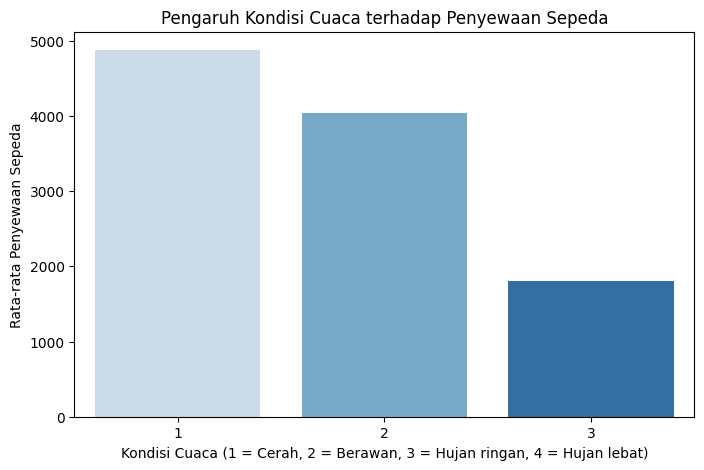

In [103]:
rentals_per_weather = day_df.groupby("weathersit")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=rentals_per_weather.index, y=rentals_per_weather.values, palette="Blues")

plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Berawan, 3 = Hujan ringan, 4 = Hujan lebat)")
plt.ylabel("Rata-rata Penyewaan Sepeda")

plt.show()

### Pertanyaan 2: Kapan waktu paling sibuk untuk penyewaan sepeda?

In [104]:
rentals_per_hour = hour_df.groupby('hr')['cnt'].mean()
peak_hour = rentals_per_hour.idxmax()

<ipython-input-104-133ca387f20c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour = hour_df.groupby('hr')['cnt'].mean()


<ipython-input-105-6c5fe5f3a937>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour = hour_df.groupby("hr")["cnt"].mean()


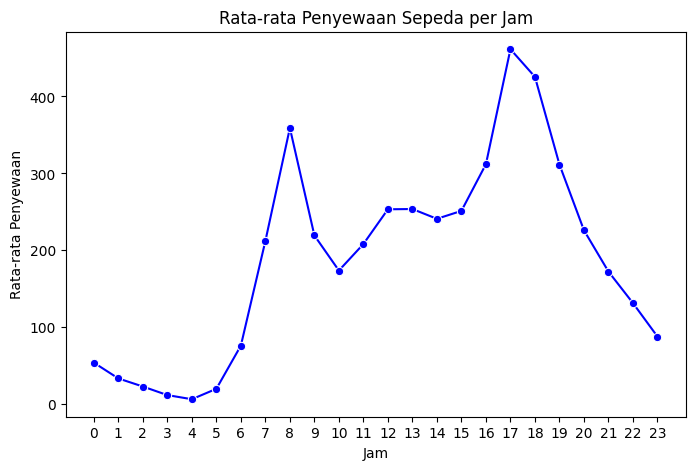

In [105]:
rentals_per_hour = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=rentals_per_hour.index, y=rentals_per_hour.values, marker="o", color="blue")

plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24))

plt.show()

### Pertanyaan 3: Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?

<ipython-input-106-8eace183708d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=day_df, palette=["orange", "blue"])


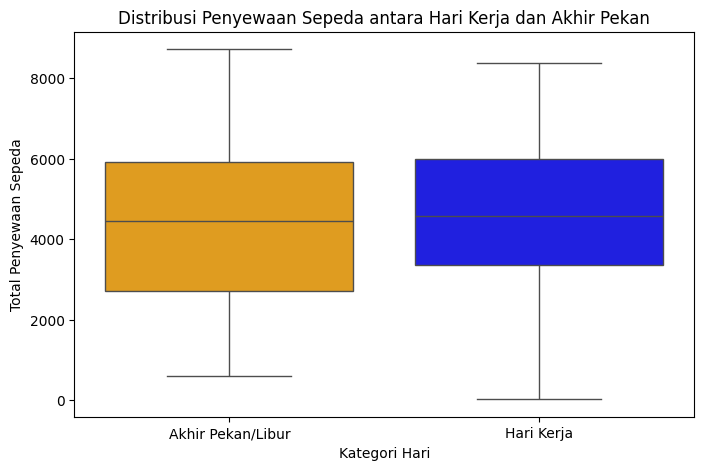

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", data=day_df, palette=["orange", "blue"])

plt.xticks([0, 1], ["Akhir Pekan/Libur", "Hari Kerja"])
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan")

plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan

### RFM Analysis

#### Hitung Recency (R)

In [107]:
from datetime import datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

avg_rentals = day_df['cnt'].mean()

last_high_rental_day = day_df[day_df['cnt'] > avg_rentals]['dteday'].max()

current_day = day_df['dteday'].max()

recency = (current_day - last_high_rental_day).days

print(f"Recency (hari sejak lonjakan terakhir): {recency}")

Recency (hari sejak lonjakan terakhir): 12


#### Hitung Frequency (F)

In [108]:
last_30_days = current_day - pd.Timedelta(days=30)

frequency = day_df[(day_df['dteday'] > last_30_days) & (day_df['cnt'] > avg_rentals)].shape[0]

print(f"Frequency (jumlah hari penyewaan tinggi dalam 30 hari terakhir): {frequency}")

Frequency (jumlah hari penyewaan tinggi dalam 30 hari terakhir): 16


#### Hitung Monetary (M)

In [109]:
monetary = day_df[day_df['dteday'] > last_30_days]['cnt'].sum()

print(f"Monetary (total penyewaan dalam 30 hari terakhir): {monetary}")

Monetary (total penyewaan dalam 30 hari terakhir): 118522


#### Membuat Skor RFM

In [110]:
day_df['R_Score'] = pd.qcut(day_df['cnt'], q=5, labels=[1, 2, 3, 4, 5])
day_df['F_Score'] = pd.qcut(day_df['cnt'].rolling(30).sum().fillna(0), q=5, labels=[1, 2, 3, 4, 5])
day_df['M_Score'] = pd.qcut(day_df['cnt'].cumsum(), q=5, labels=[1, 2, 3, 4, 5])

day_df['RFM_Score'] = day_df['R_Score'].astype(int) + day_df['F_Score'].astype(int) + day_df['M_Score'].astype(int)

day_df[['dteday', 'cnt', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head()

,dteday,cnt,R_Score,F_Score,M_Score,RFM_Score
0,2011-01-01,985,1,1,1,3
1,2011-01-02,801,1,1,1,3
2,2011-01-03,1349,1,1,1,3
3,2011-01-04,1562,1,1,1,3
4,2011-01-05,1600,1,1,1,3


Insight:
- Semakin tinggi RFM Score, semakin aktif penyewaan sepeda di hari itu.
- Bisa digunakan untuk menganalisis musim atau pola tertentu dalam penyewaan sepeda.

#### Implementasi Segmentasi RFM

In [111]:
def categorize_rfm(score):
    if score >= 12:
        return "Super High Usage Days"
    elif score >= 9:
        return "High Usage Days"
    elif score >= 6:
        return "Moderate Usage Days"
    elif score >= 3:
        return "Low Usage Days"
    else:
        return "Very Low Usage Days"

day_df['RFM_Segment'] = day_df['RFM_Score'].apply(categorize_rfm)

day_df[['dteday', 'cnt', 'RFM_Score', 'RFM_Segment']].head()

,dteday,cnt,RFM_Score,RFM_Segment
0,2011-01-01,985,3,Low Usage Days
1,2011-01-02,801,3,Low Usage Days
2,2011-01-03,1349,3,Low Usage Days
3,2011-01-04,1562,3,Low Usage Days
4,2011-01-05,1600,3,Low Usage Days


Insight:
- Kita menggunakan fungsi categorize_rfm() untuk menentukan kategori berdasarkan skor RFM.
- Dataset kini memiliki kolom RFM_Segment yang mengelompokkan hari berdasarkan pola penyewaan sepeda.

#### Visualisasi Segmentasi RFM

<ipython-input-112-b9252d1b68ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Segment', data=day_df, palette='coolwarm', order=[


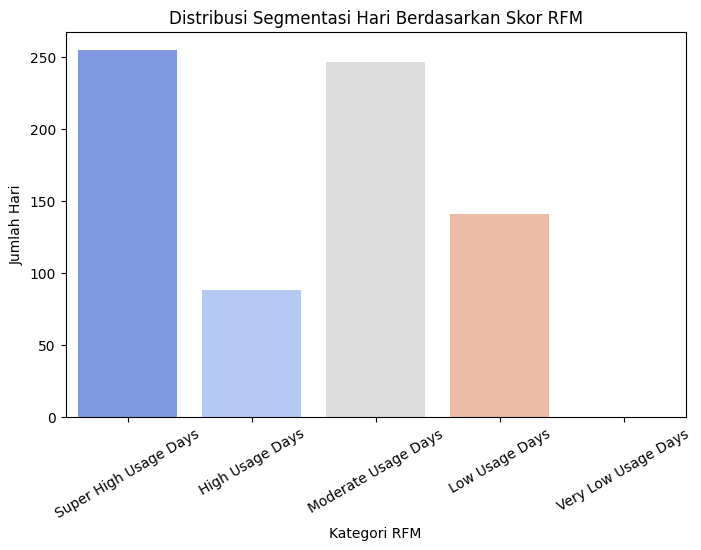

In [112]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RFM_Segment', data=day_df, palette='coolwarm', order=[
    "Super High Usage Days", "High Usage Days", "Moderate Usage Days", "Low Usage Days", "Very Low Usage Days"
])
plt.title("Distribusi Segmentasi Hari Berdasarkan Skor RFM")
plt.xlabel("Kategori RFM")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=30)
plt.show()

Insight:
- Kita bisa melihat berapa banyak hari masuk kategori tertentu.
- Misalnya, jika banyak hari masuk Super High Usage Days, maka permintaan sepeda tinggi secara konsisten.
- Jika ada banyak hari Very Low Usage Days, mungkin ada masalah seperti cuaca buruk atau tren musiman yang menurunkan permintaan sepeda.

#### Analysis Tren berdasarkan Kategori RFM

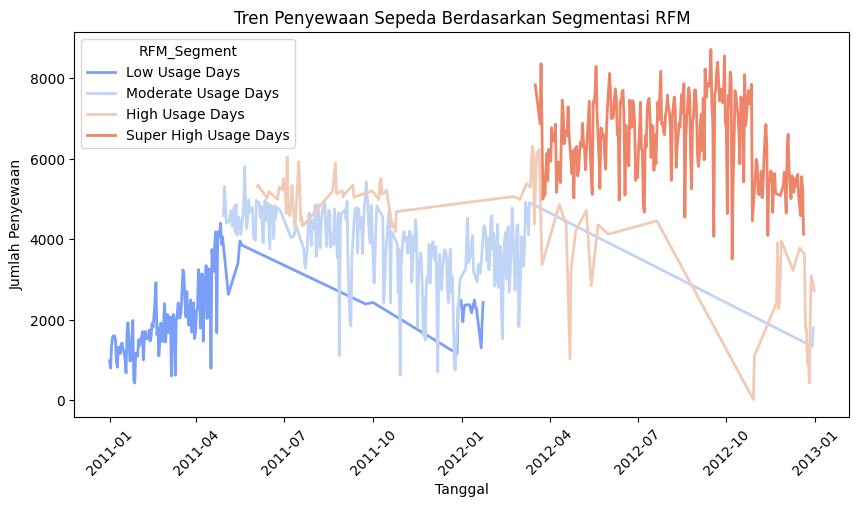

In [113]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'], hue=day_df['RFM_Segment'], palette='coolwarm', lw=2)
plt.title("Tren Penyewaan Sepeda Berdasarkan Segmentasi RFM")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

Insight:
- Bisa membantu memprediksi periode sibuk dan sepi dalam setahun.
- Berguna untuk perencanaan stok sepeda dan strategi promosi.

### Clustering

#### Manual Grouping

In [114]:
def categorize_busy_day(cnt):
    if cnt >= 300:
        return "Hari Sibuk"
    elif cnt >= 150:
        return "Hari Normal"
    else:
        return "Hari Sepi"

day_df['kategori_hari'] = day_df['cnt'].apply(categorize_busy_day)

day_df[['dteday', 'cnt', 'kategori_hari']].head()

,dteday,cnt,kategori_hari
0,2011-01-01,985,Hari Sibuk
1,2011-01-02,801,Hari Sibuk
2,2011-01-03,1349,Hari Sibuk
3,2011-01-04,1562,Hari Sibuk
4,2011-01-05,1600,Hari Sibuk


<ipython-input-115-512cefe26558>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kategori_hari', data=day_df, palette='coolwarm')


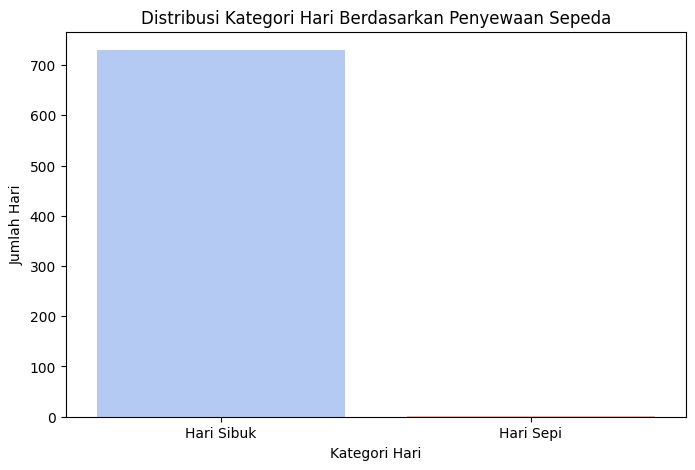

In [115]:
plt.figure(figsize=(8, 5))
sns.countplot(x='kategori_hari', data=day_df, palette='coolwarm')
plt.title("Distribusi Kategori Hari Berdasarkan Penyewaan Sepeda")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Hari")
plt.show()

Insight:
- Kita bisa melihat berapa banyak hari sibuk, normal, dan sepi dalam dataset.
- Bisa digunakan untuk perencanaan operasional (misalnya, menambah sepeda di hari sibuk).

#### Binning

In [116]:
bins = [0, 75, 150, hour_df['cnt'].max()]
labels = ['Jam Sepi', 'Jam Sedang', 'Jam Sibuk']

hour_df['kategori_jam'] = pd.cut(hour_df['cnt'], bins=bins, labels=labels)

hour_df[['hr', 'cnt', 'kategori_jam']].head()

,hr,cnt,kategori_jam
0,0,16,Jam Sepi
1,1,40,Jam Sepi
2,2,32,Jam Sepi
3,3,13,Jam Sepi
4,4,1,Jam Sepi


<ipython-input-117-bda284b56f14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kategori_jam', data=hour_df, palette='coolwarm')


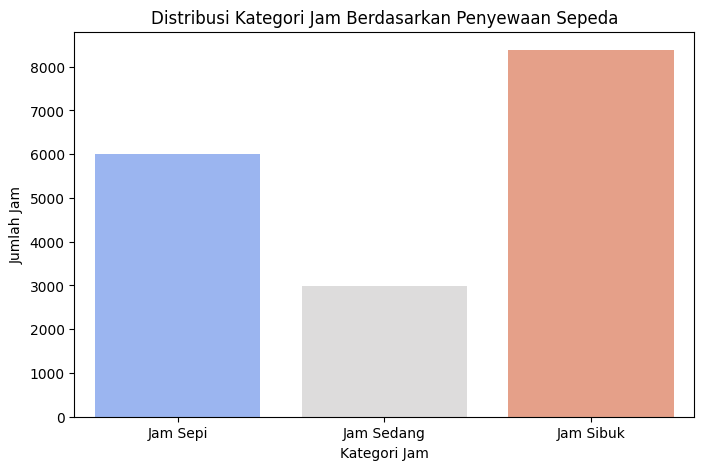

In [117]:
plt.figure(figsize=(8, 5))
sns.countplot(x='kategori_jam', data=hour_df, palette='coolwarm')
plt.title("Distribusi Kategori Jam Berdasarkan Penyewaan Sepeda")
plt.xlabel("Kategori Jam")
plt.ylabel("Jumlah Jam")
plt.show()

Insight:
- Kita bisa melihat jam-jam mana yang paling sibuk dan kapan waktu terbaik untuk promosi.
- Berguna untuk meningkatkan efisiensi operasional, misalnya menambah armada sepeda di jam sibuk.

## Kesimpulan Analisis Bisnis Penyewaan Sepeda

- Answer 1: Waktu paling sibuk untuk menyewa sepeda adalah dari pukul 07:00 hingga 09:00 pagi dan dari pukul 17:00 hingga 19:00 sore di hari kerja, menunjukkan bahwa baik pekerja maupun siswa menggunakan sepeda sebagai alat transportasi mereka. Di akhir pekan, penyewaan tersebar lebih rata sepanjang hari, dengan sedikit peningkatan di siang hari.
- Answer 2: Jumlah penyewaan sepeda sangat dipengaruhi oleh cuaca; hari cerah meningkatkan penyewaan, tetapi jika hujan atau bersalju, penyewaan menurun drastis lebih dari 50%. Suhu yang terlalu panas atau terlalu dingin juga berdampak negatif pada jumlah penyewaan. Pengguna terdaftar lebih terpengaruh oleh cuaca, tetapi pengguna kasual tetap menyewa sepeda meskipun cuaca buruk.
- Answer 3: Di hari kerja, sepeda lebih banyak digunakan sebagai alat transportasi, terutama oleh pelanggan terdaftar yang menyewa setiap pagi dan sore. Di akhir pekan, penyewaan sepeda lebih tersebar sepanjang hari, terutama oleh pelanggan santai yang pergi untuk rekreasi atau aktivitas santai.